In [2]:
import numpy as np
import pandas as pd
from helpers import load_csv_data,create_csv_submission
import implementation
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [3]:
yb, input_data, ids = load_csv_data("./data/train.csv")

In [4]:
np.unique(yb,return_counts=True)

(array([-1.,  1.]), array([164333,  85667]))

In [5]:
data_frame_input_data = pd.DataFrame(input_data)

In [6]:
print(data_frame_input_data.mean().min())
print(data_frame_input_data.mean().max())
print(data_frame_input_data.std().min())
print(data_frame_input_data.std().max())

-709.3566029000048
209.79717763200114
0.7829111186453125
657.9723021131681


<AxesSubplot: >

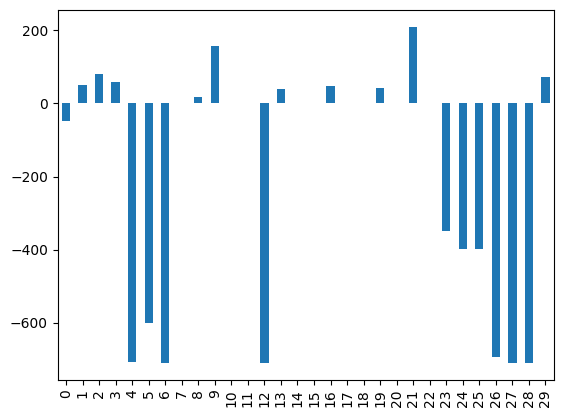

In [7]:
data_frame_input_data.mean().plot(kind = 'bar')



<AxesSubplot: >

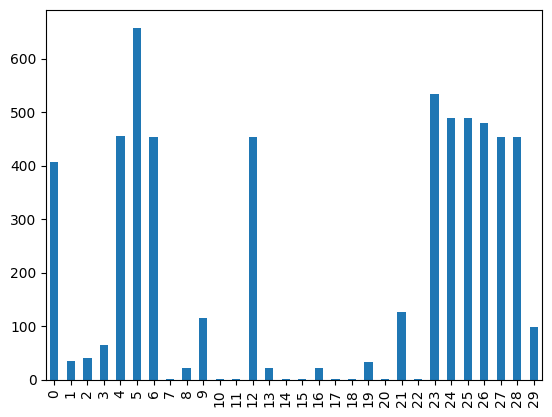

In [8]:
data_frame_input_data.std().plot(kind = 'bar')

In [9]:
data_frame_input_data_normalized = data_frame_input_data.copy()

In [10]:
for col in data_frame_input_data_normalized.columns:
    data_frame_input_data_normalized[col] = (data_frame_input_data_normalized[col] - data_frame_input_data_normalized[col].mean()) / data_frame_input_data_normalized[col].std() 

<AxesSubplot: >

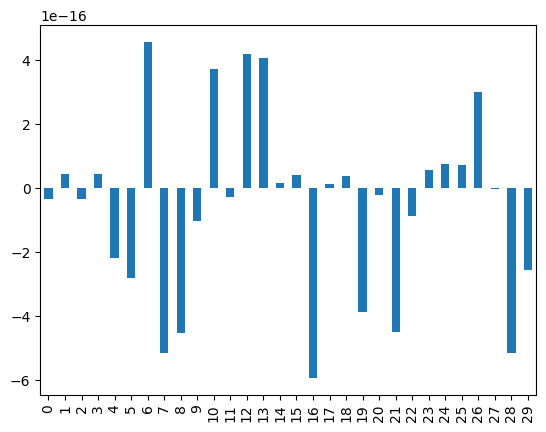

In [11]:
data_frame_input_data_normalized.mean().plot(kind = 'bar')


In [12]:
data_frame_input_data_normalized_with_label = data_frame_input_data_normalized.copy()
data_frame_input_data_normalized_with_label.columns = ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]
data_frame_input_data_normalized_with_label["Prediction"] = yb


Be carefull while looking at the plots below, the Full distribution isn't simply both graphs to the right added up. 
Since I'm using the parameter "density=True" it will scale each histogram in a way that the sum per graph = 1

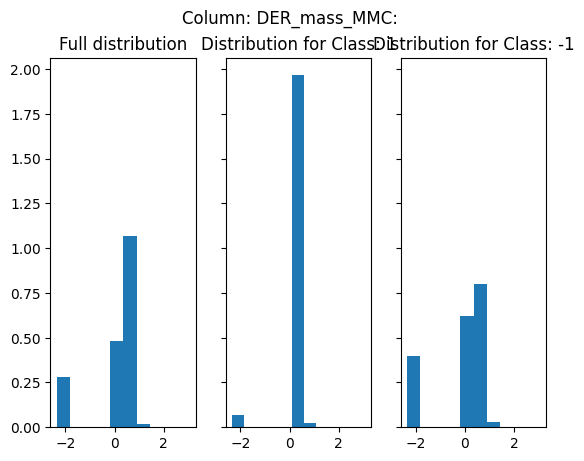

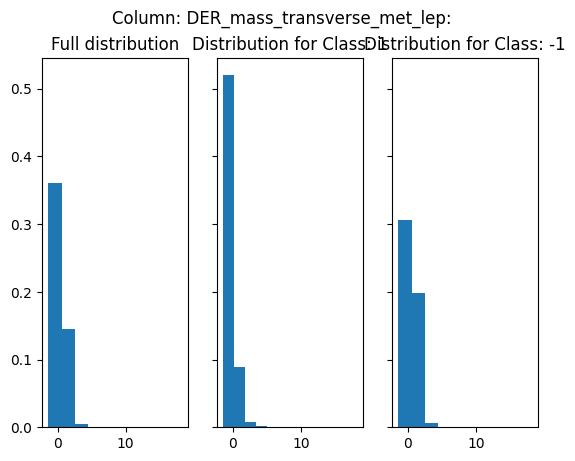

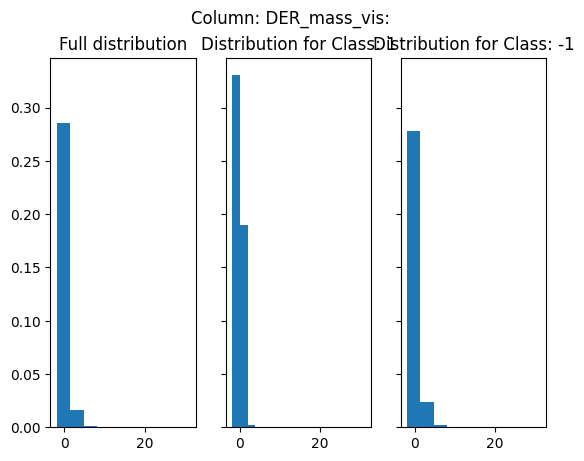

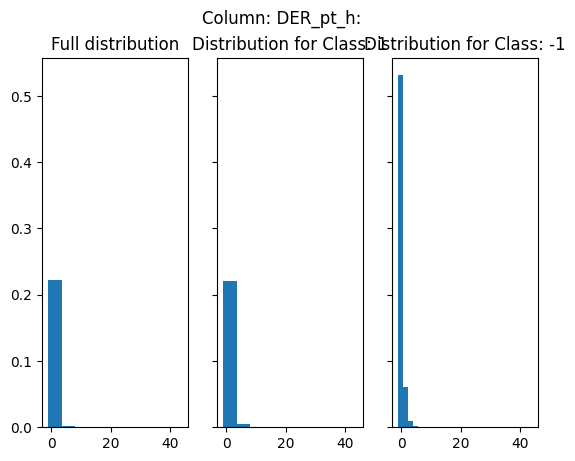

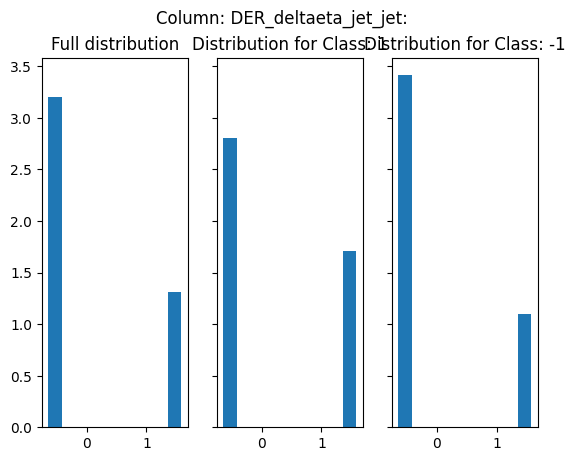

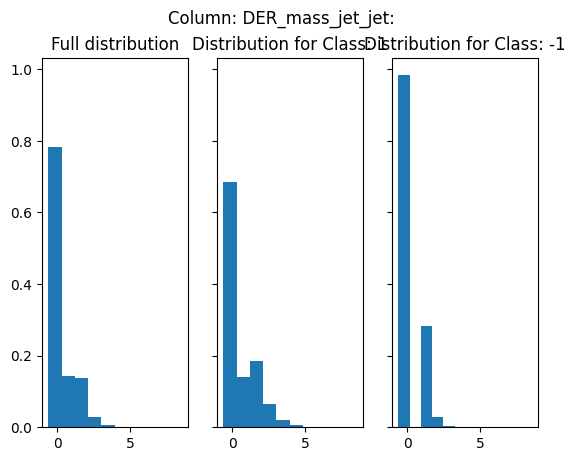

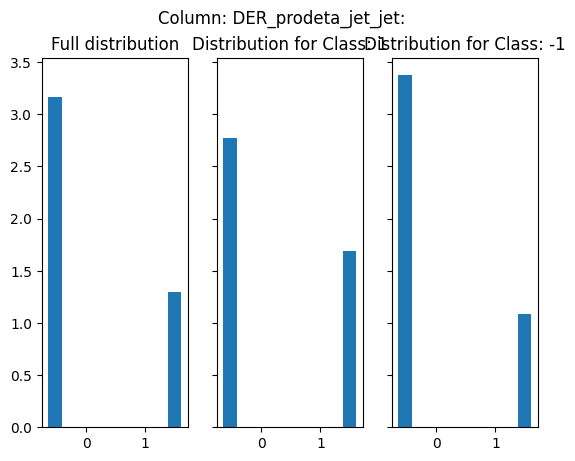

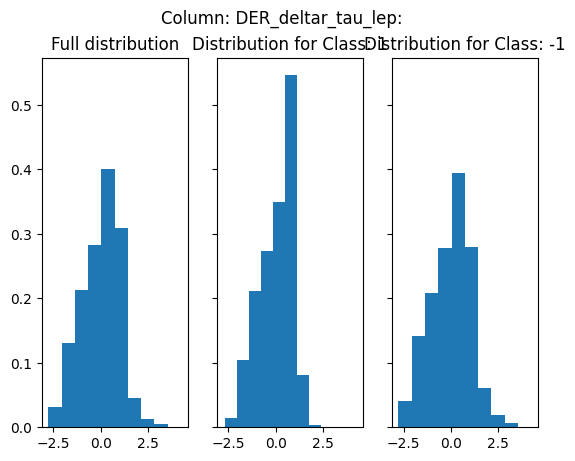

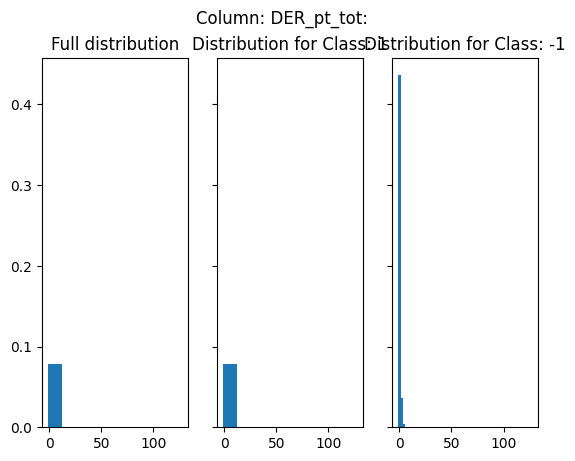

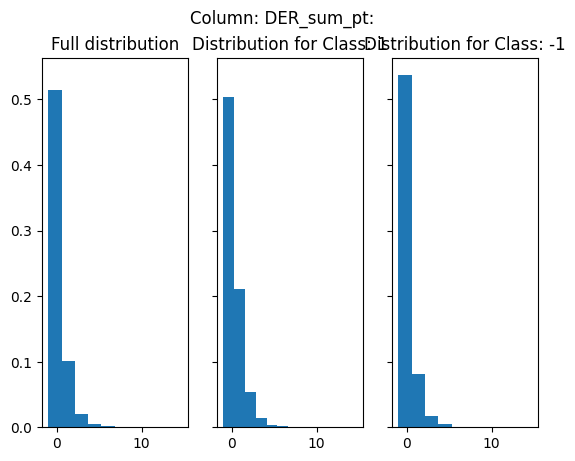

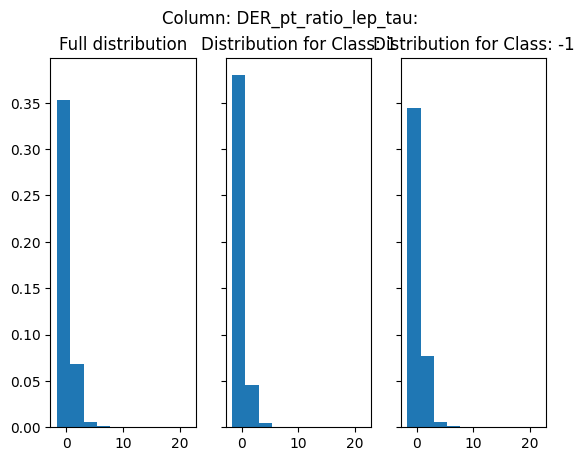

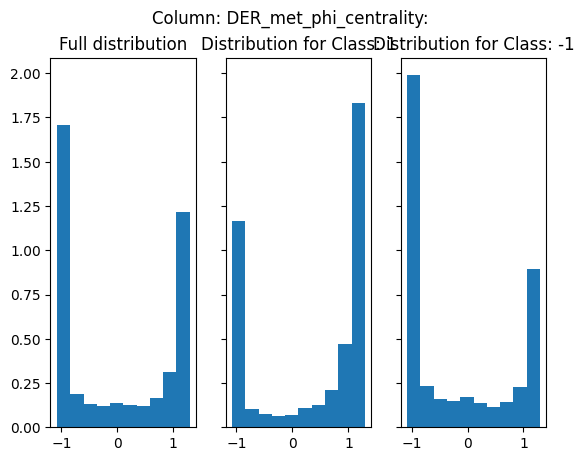

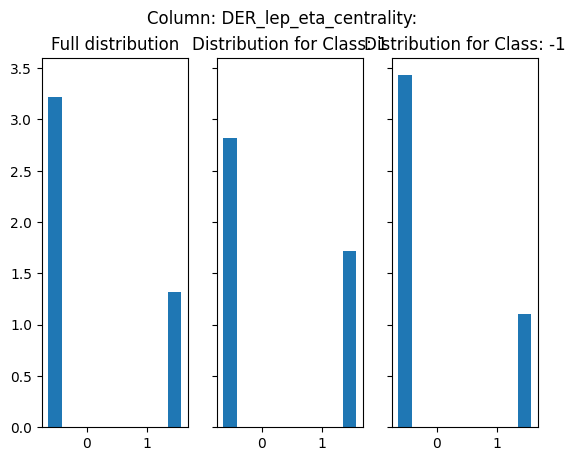

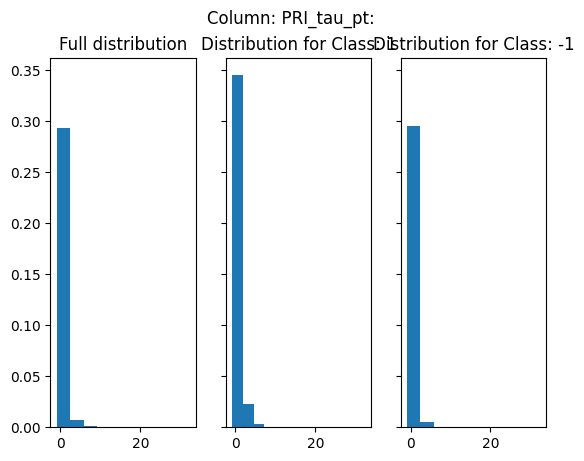

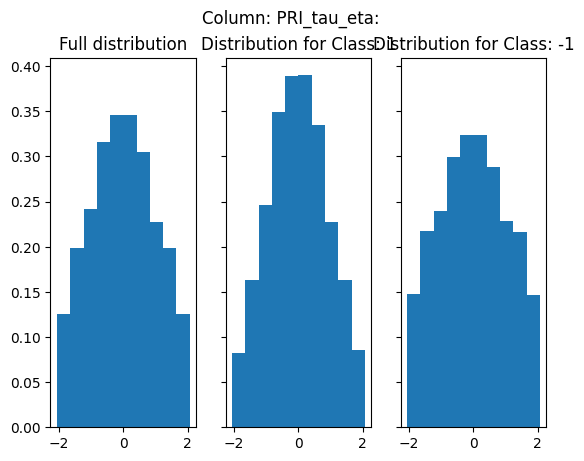

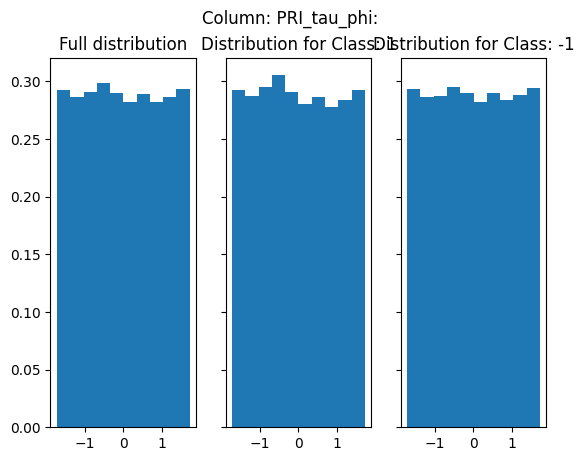

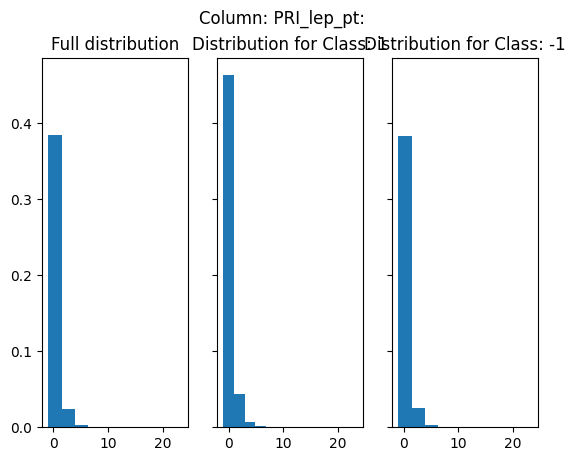

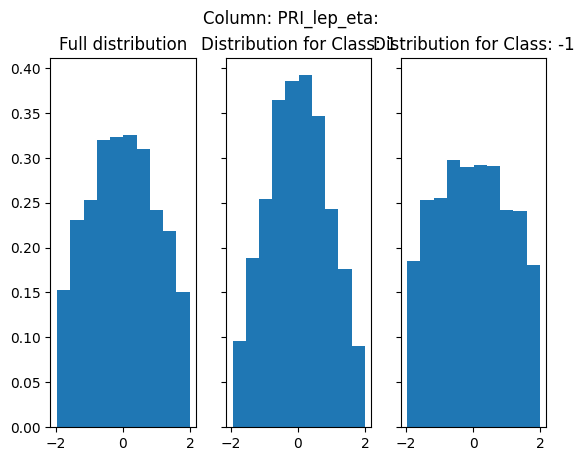

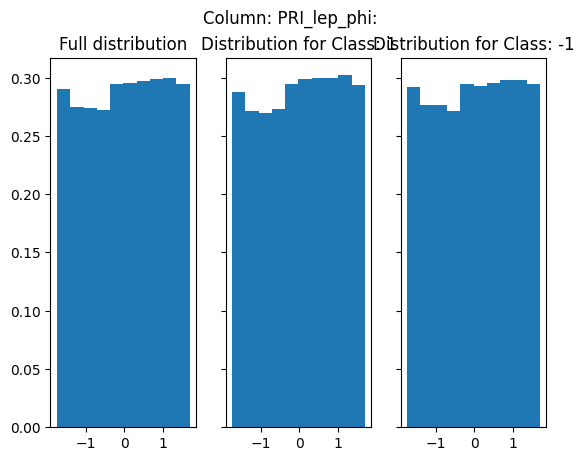

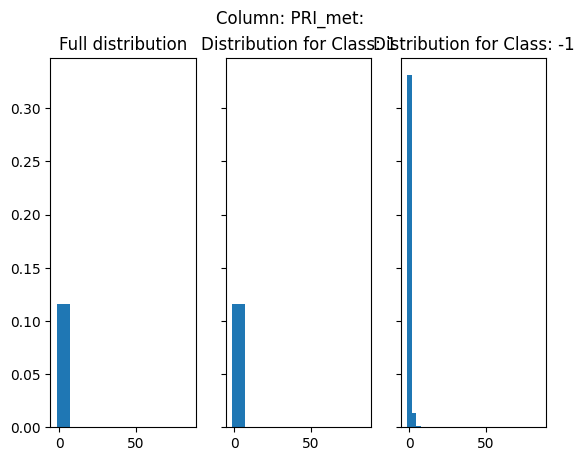

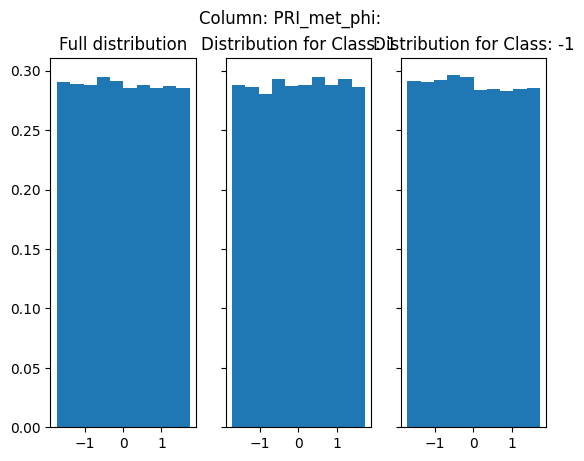

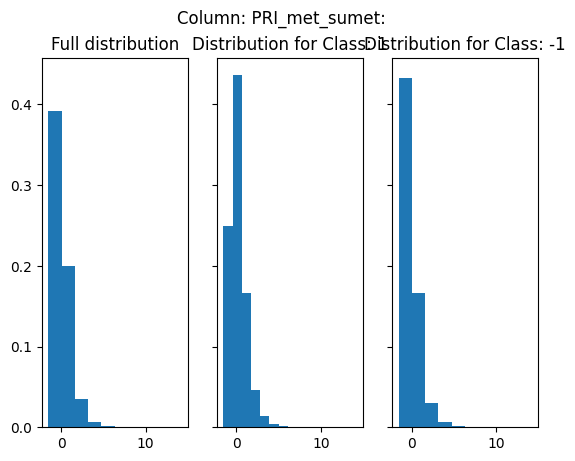

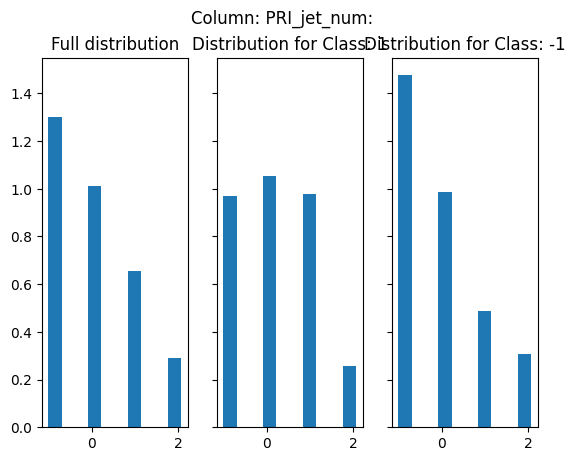

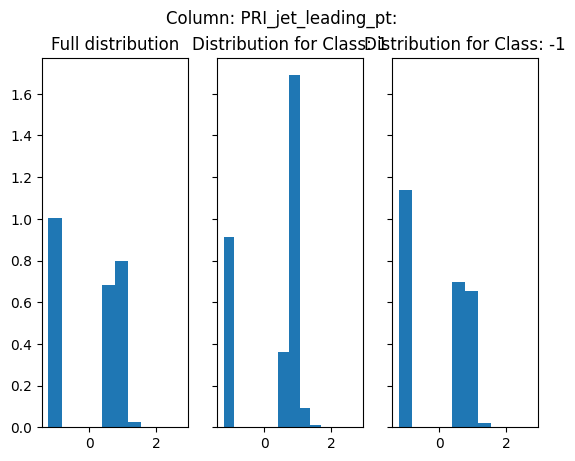

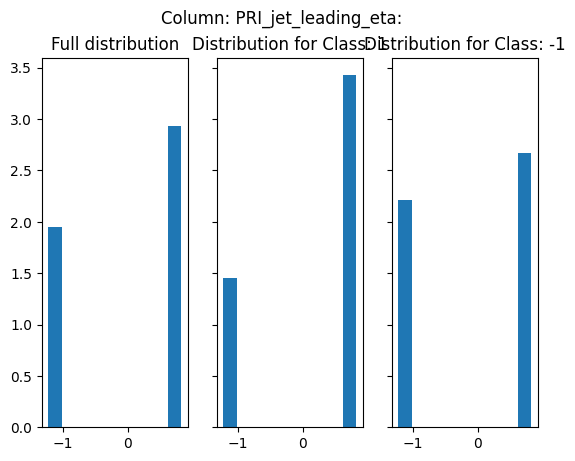

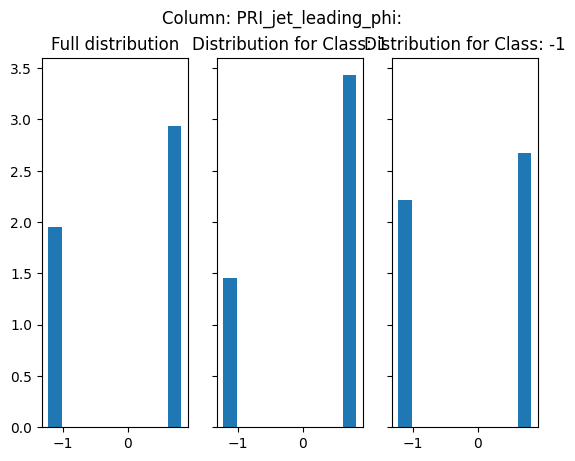

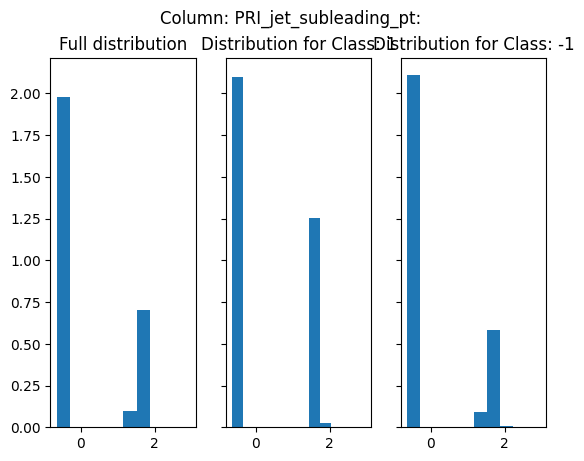

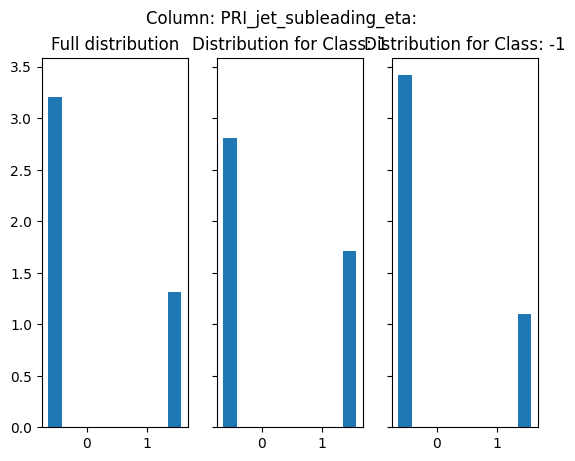

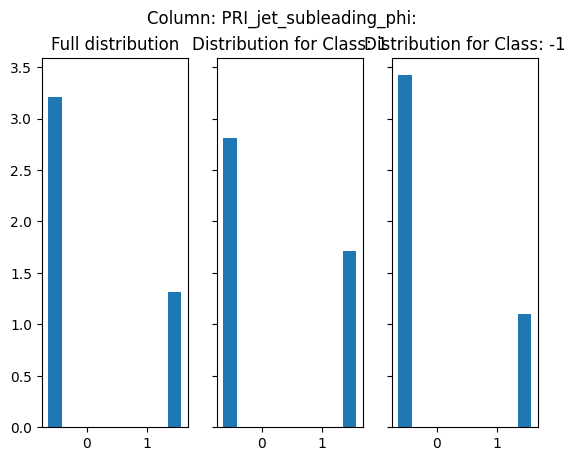

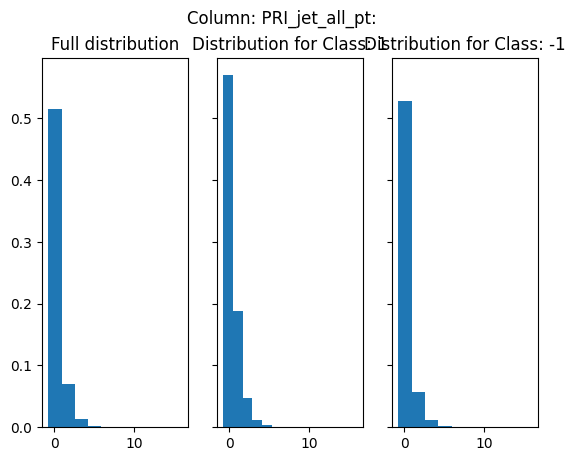

In [20]:
for col in data_frame_input_data_normalized_with_label.columns[:-1]:
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,sharex=True)
    fig.suptitle(f"Column: {col}:")
    
    ax1.hist(data_frame_input_data_normalized_with_label[col],density=True)
    ax1.set_title(f"Full distribution")

    ax2.set_title("Distribution for Class: 1",loc="center")
    ax2.hist(data_frame_input_data_normalized_with_label.query('Prediction==1')[col],density=True)
    ax3.hist(data_frame_input_data_normalized_with_label.query('Prediction==-1')[col],density=True)
    ax3.set_title("Distribution for Class: -1")
    plt.show()

In [14]:
data_frame_input_data_normalized_with_label

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Prediction
0,0.461413,0.068332,0.407679,-0.469965,1.560750,1.103311,1.571725,0.882476,1.033096,0.339894,...,0.386846,1.044400,0.780101,0.820300,0.816832,1.538822,1.566797,1.558581,0.412510,1.0
1,0.516703,0.552504,0.540135,-0.153167,-0.639366,-0.604528,-0.639361,1.404885,-0.756026,-0.287584,...,-0.357718,0.021305,0.740306,0.817388,0.818292,-0.638955,-0.639365,-0.639366,-0.273819,-1.0
2,-2.337854,3.195149,1.096558,-0.349709,-0.639366,-0.604528,-0.639361,0.989768,-0.430167,0.340360,...,0.400135,0.021305,0.736600,0.820102,0.811781,-0.638955,-0.639365,-0.639366,-0.293969,-1.0
3,0.474788,0.910377,-0.005853,-0.903014,-0.639366,-0.604528,-0.639361,1.196688,-0.830733,-0.712704,...,-0.978148,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0
4,0.553438,-0.914554,1.313366,-0.651803,-0.639366,-0.604528,-0.639361,1.938790,-0.112795,-0.868141,...,-1.238473,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-2.337854,0.643634,-1.093201,-0.830310,-0.639366,-0.604528,-0.639361,-1.253143,-0.622953,-0.886213,...,-0.514881,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0
249996,-2.337854,0.252913,-0.320828,-0.557012,-0.639366,-0.604528,-0.639361,0.270657,0.158110,-0.931794,...,-1.022843,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0
249997,0.380169,0.319316,-0.130863,-0.284954,-0.639366,-0.604528,-0.639361,0.021586,0.146617,-0.328161,...,-0.086089,0.021305,0.732362,0.819585,0.815586,-0.638955,-0.639365,-0.639366,-0.317017,1.0
249998,0.354314,-0.845322,-0.302973,-0.697376,-0.639366,-0.604528,-0.639361,1.266938,-0.243039,-0.886498,...,-0.767427,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0


In [15]:



cm = sns.light_palette("red", as_cmap=True)
data_frame_input_data_normalized_with_label.groupby('Prediction').cov().style.background_gradient(cmap=cm).set_precision(2)

/tmp/ipykernel_4416/922947016.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data_frame_input_data_normalized_with_label.groupby('Prediction').cov().style.background_gradient(cmap=cm).set_precision(2)


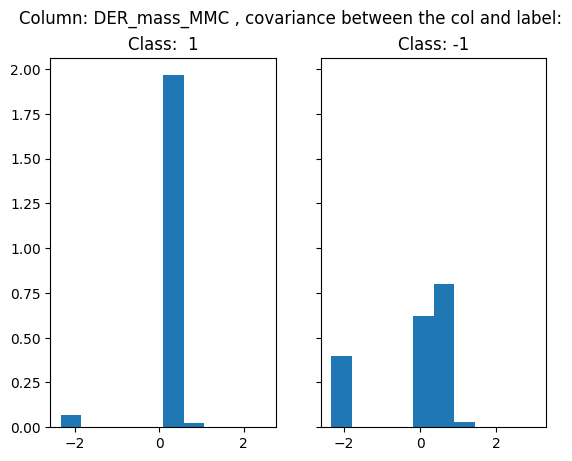

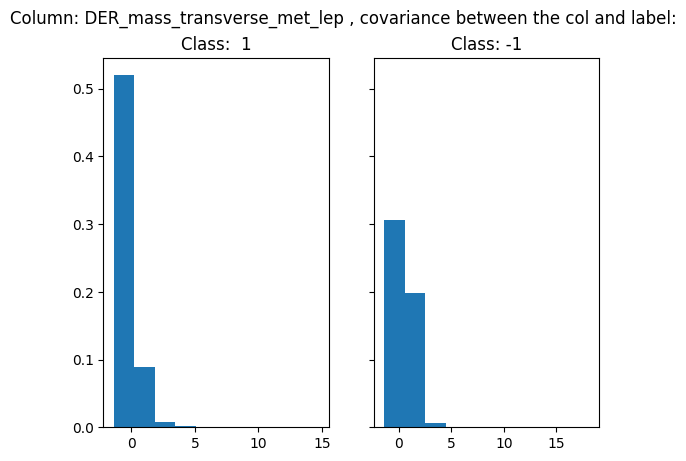

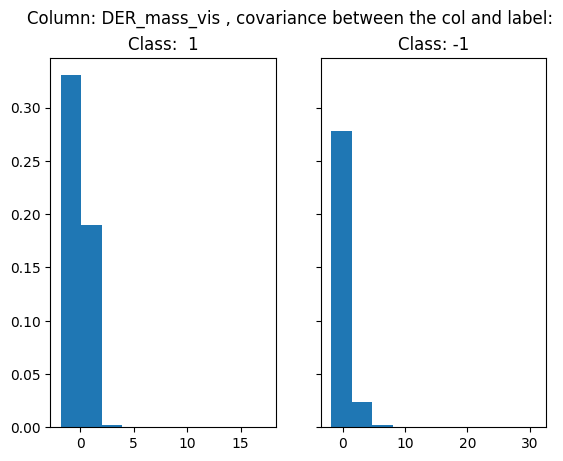

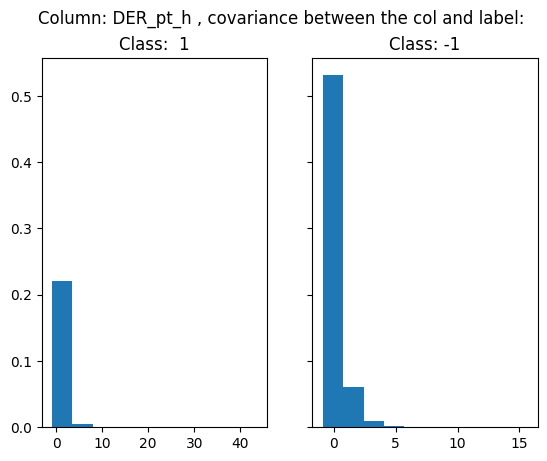

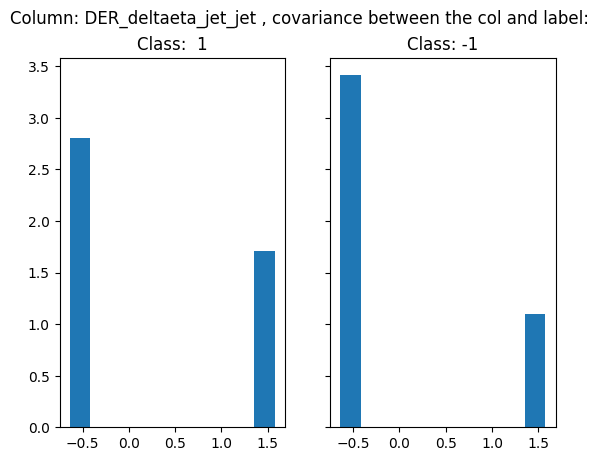

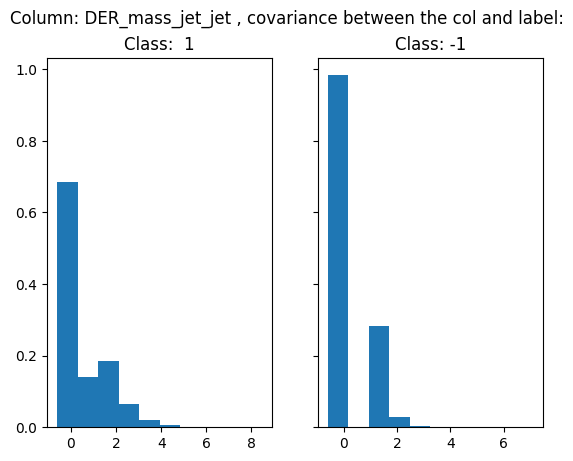

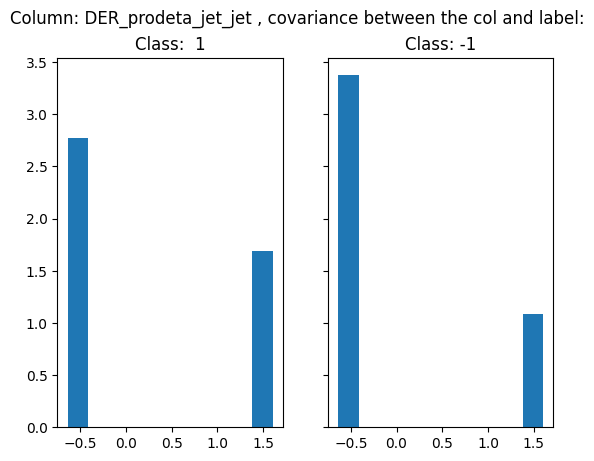

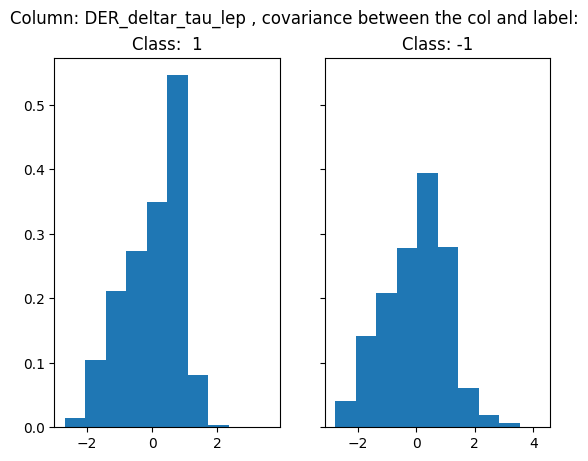

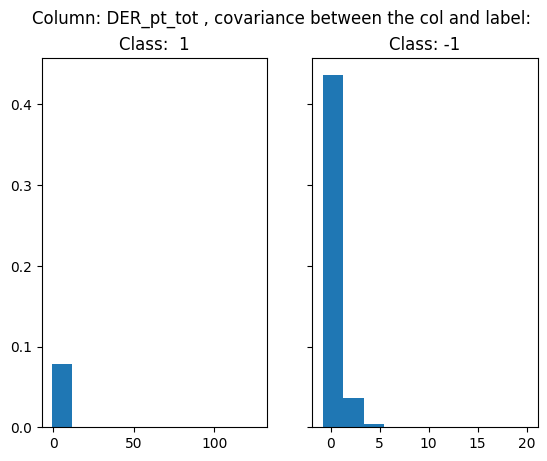

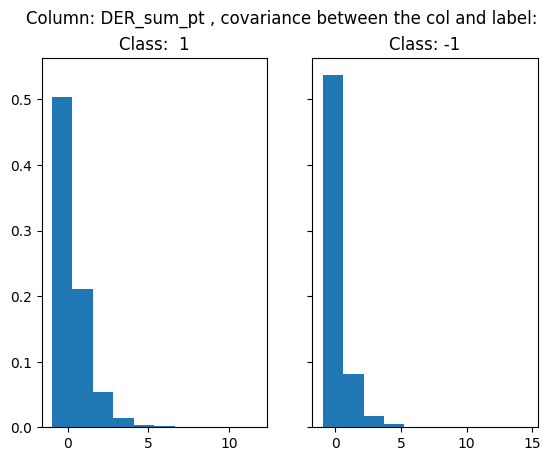

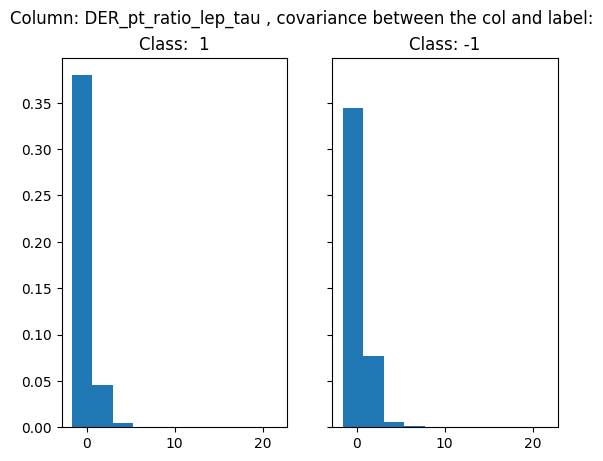

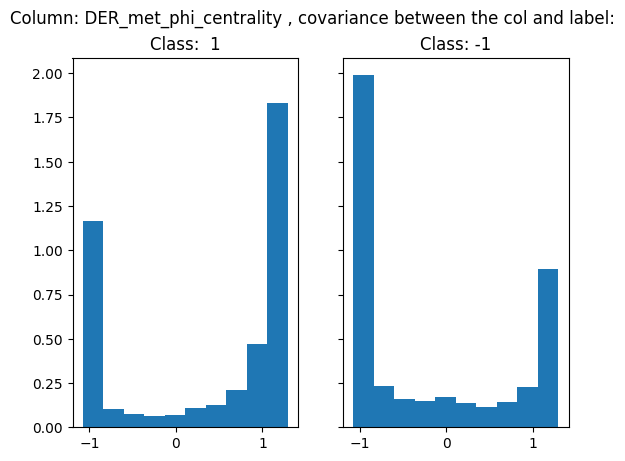

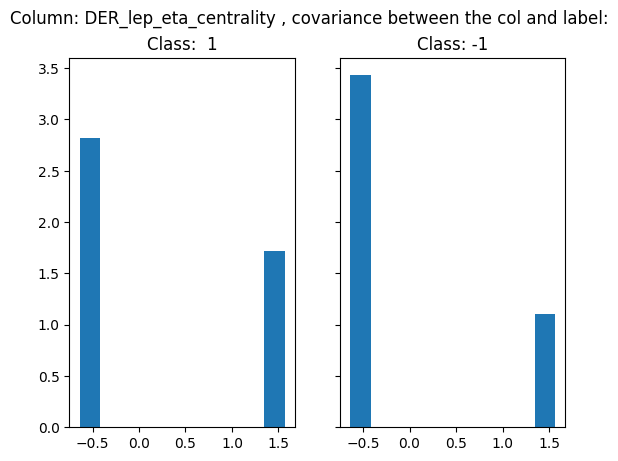

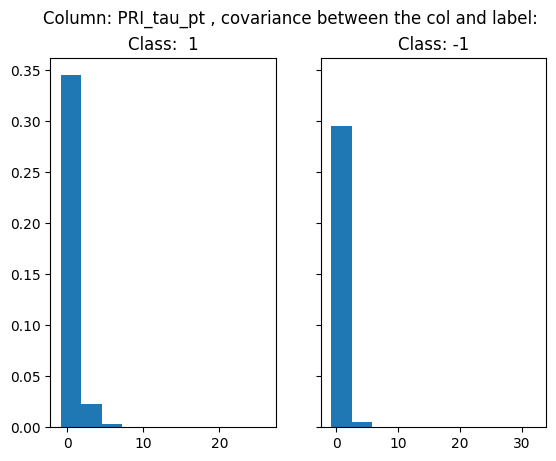

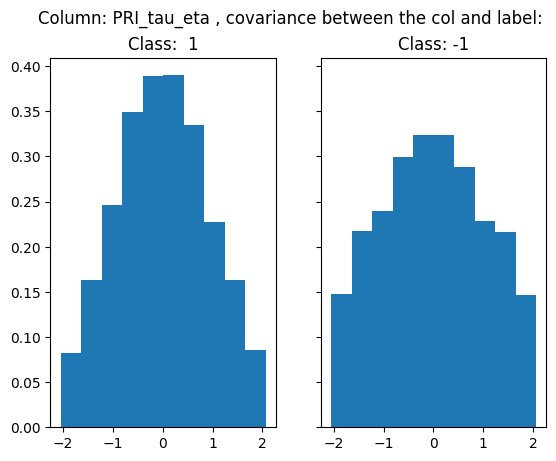

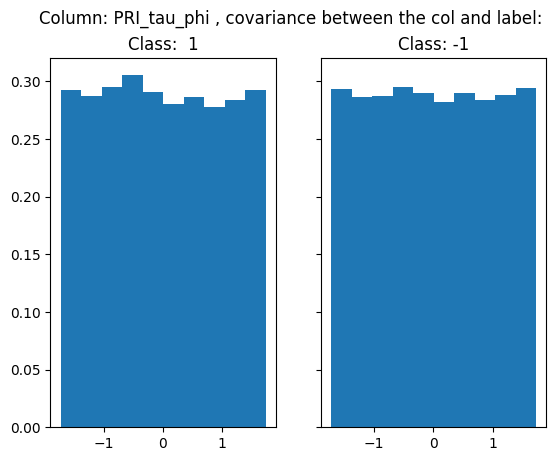

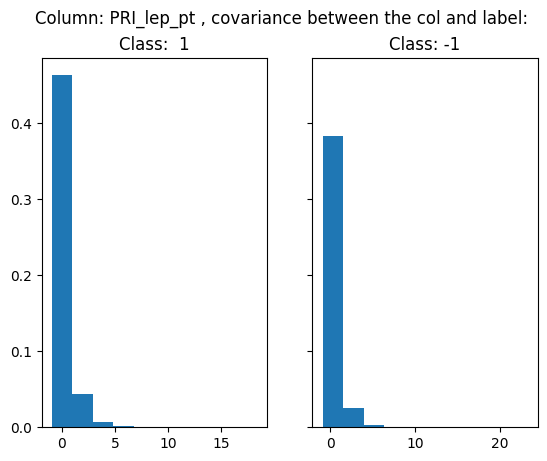

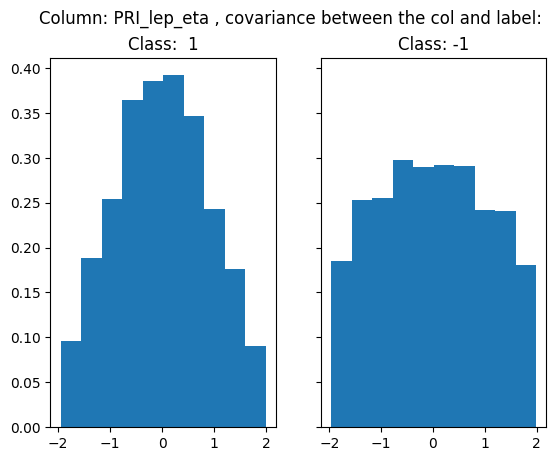

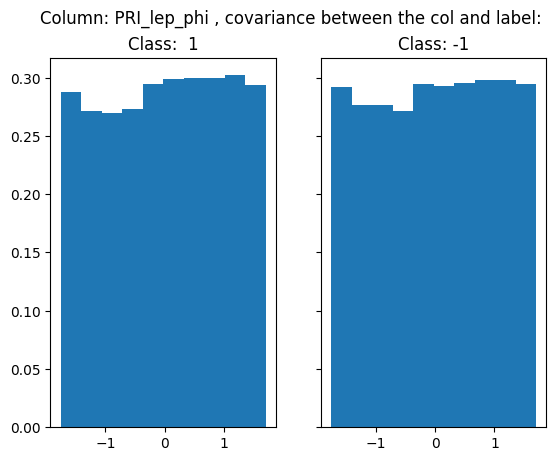

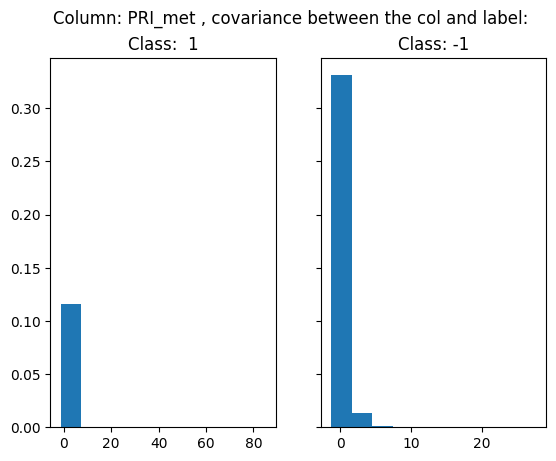

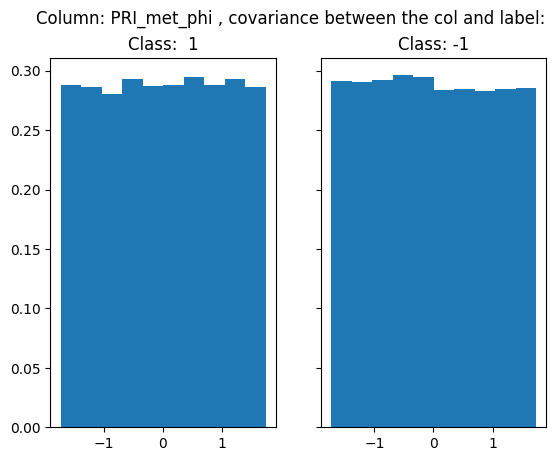

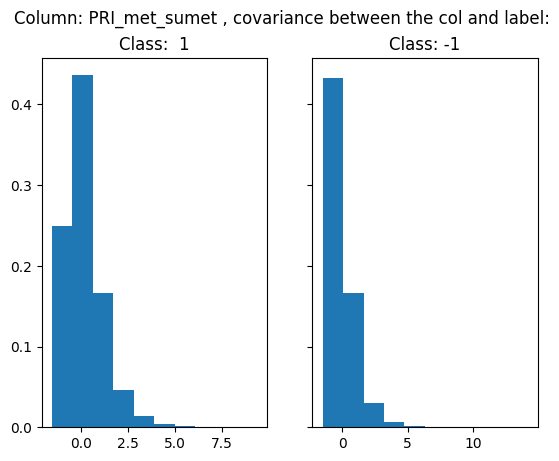

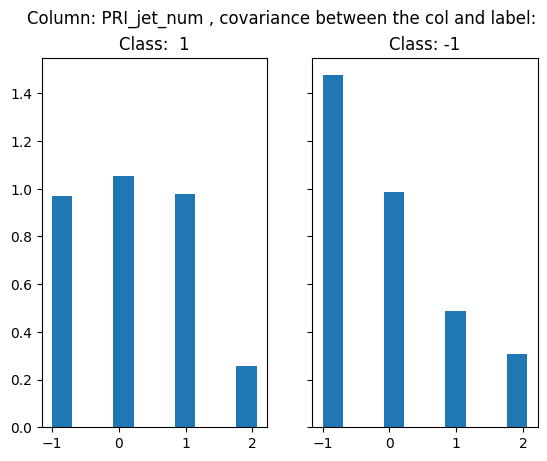

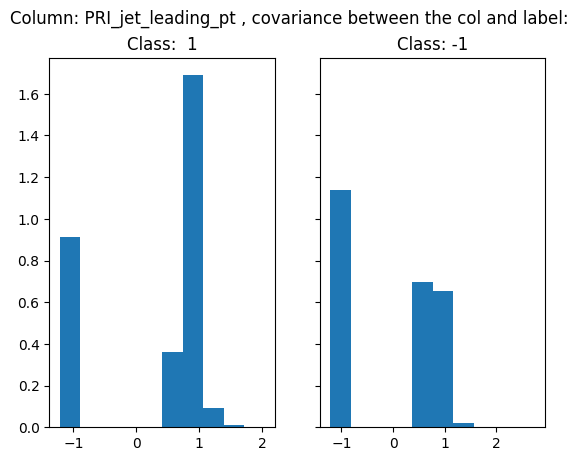

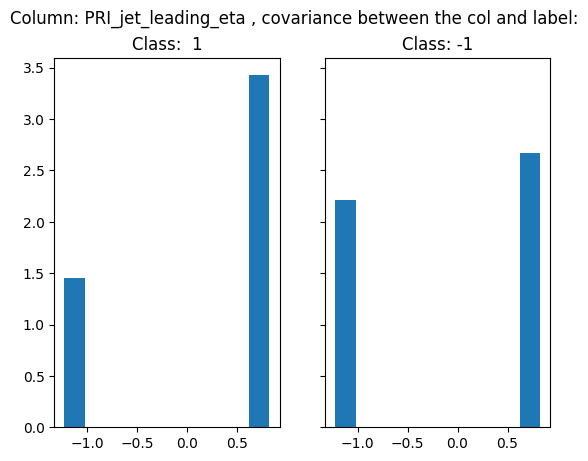

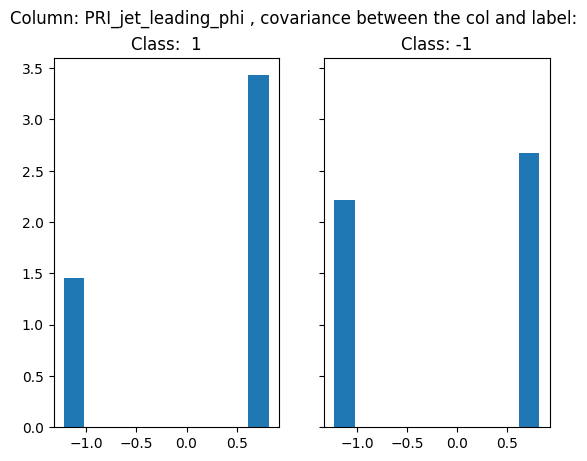

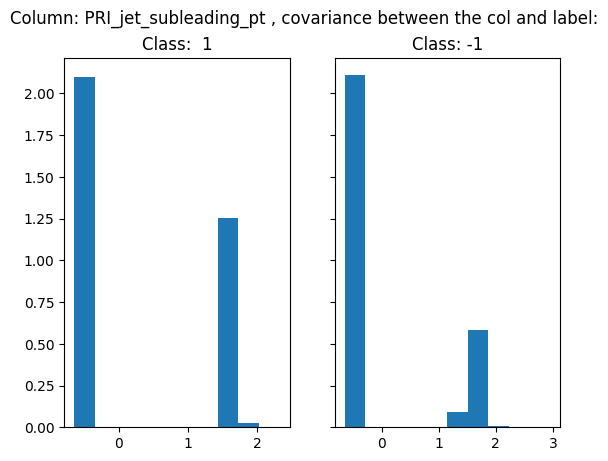

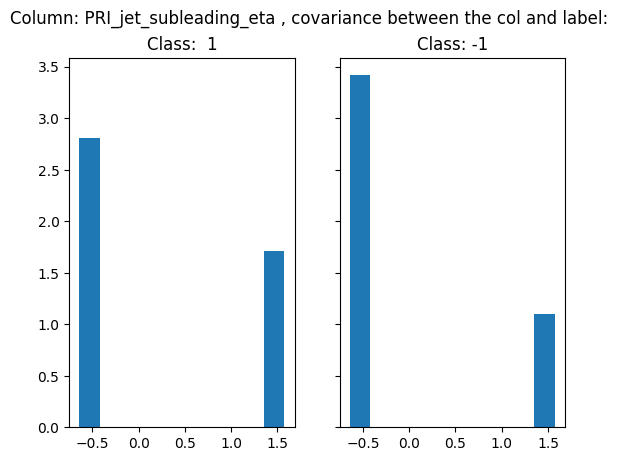

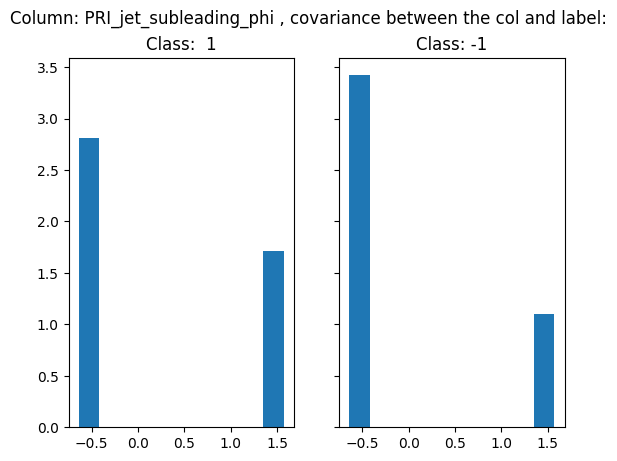

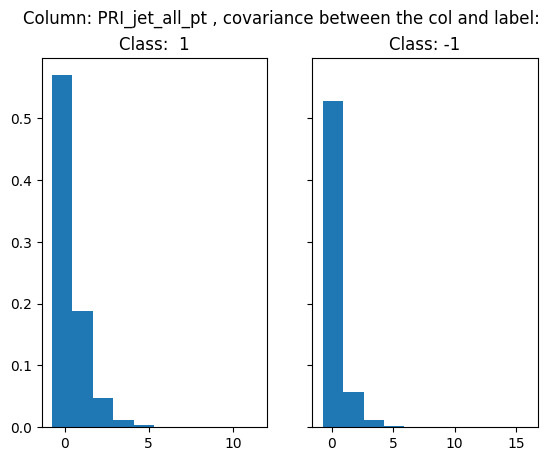

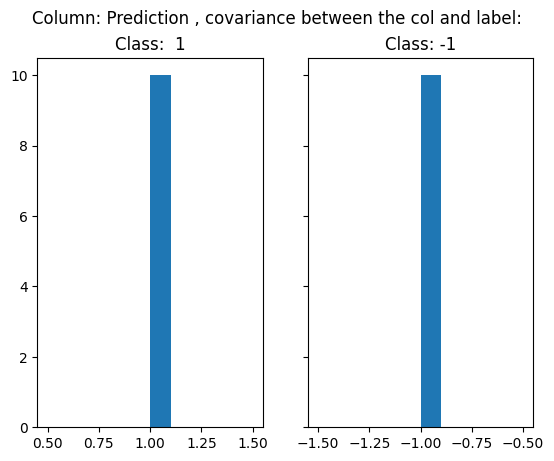

In [16]:
for col in data_frame_input_data_normalized_with_label.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    fig.suptitle(f"Column: {col} , covariance between the col and label:")
    ax1.set_title("Class:  1",loc="center")
    ax2.set_title("Class: -1")
    ax1.hist(data_frame_input_data_normalized_with_label.query('Prediction==1')[col],density=True)
    ax2.hist(data_frame_input_data_normalized_with_label.query('Prediction==-1')[col],density=True)
    plt.show()